#Практическая работа 1

##Собранные данные

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
heights = [193, 181.9, 183, 177, 154, 187, 170, 190, 163, 185, 183, 183, 168,
           180, 182, 190, 187, 177, 170, 168, 188, 166, 178, 185, 182.5]
n_heights = len(heights)
months = [1, 2, 1, 5, 1, 7, 11, 11, 11, 11, 9, 11, 7, 10, 6]
dct = {}
for i in months:
    dct[i] = 1 + dct.get(i, 0)
n_months = len(months)

##Работа с месяцами

• Построить вариационный ряд с абсолютными и относительными
частотами по выборке дискретных данных<br>
• Построить полигон относительных частот вариационного ряда<br>
• Выписать выражение для эмпирической функции распределения<br>
и построить её график<br>
• Рассчитать выборочные описательные статистики:<br>
❖ выборочное среднее<br>
❖ выборочную дисперсию<br>
❖ выборочное стандартное отклонение<br>
❖ выборочную медиану<br>
❖ коэффициент вариации<br>

###Вариационный ряд с абсолютными и относительными частотами

In [ ]:
months.sort()
months
df = pd.DataFrame({'xi': list(set(months)), 'ni': [0] * len(set(months)), 'wi': [0] * len(set(months))})
for i in range(8):
    df['ni'][i] = dct[df['xi'][i]]
    df['wi'][i] = round(df['ni'][i] / n_months, 4)
df['ni'].astype(int)
df.set_index('xi').T

<ipython-input-6-025b2ed509a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ni'][i] = dct[df['xi'][i]]


xi,1,2,5,6,7,9,10,11
ni,3.0,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,5.0000
wi,0.2,0.0667,0.0667,0.0667,0.1333,0.0667,0.0667,0.3333


###Полигон относительных частот вариационного ряда

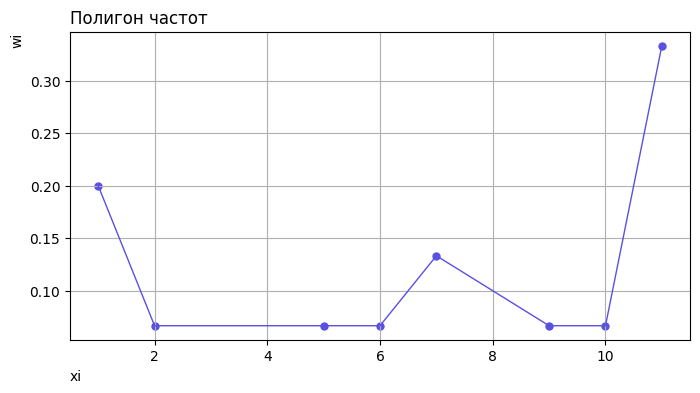

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.set_title('Полигон частот', loc = 'left')
ax.set_xlabel('xi', loc = 'left')
ax.set_ylabel('wi', loc = 'top')
ax.plot(df['xi'], df['wi'], linewidth=1.0, color='#5A50E2')
ax.scatter(df['xi'], df['wi'], color='#5A50E2', s=25)
plt.grid()
plt.show()

###Выражение для эмпирической функции распределения

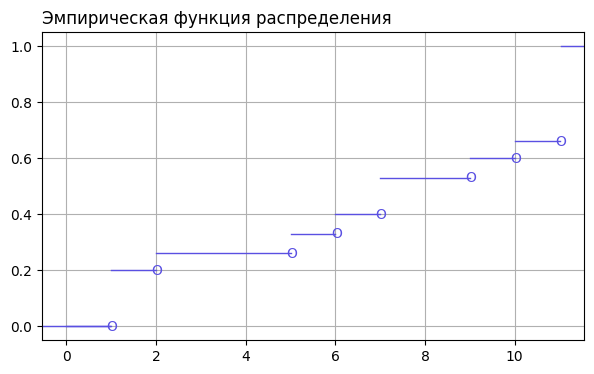

In [ ]:
def func(x):
    return x / 15

y = [0, 0.2, 0.26, 0.33, 0.4, 0.53, 0.6, 0.66, 1]
x = [0, 1, 2, 5, 6, 7, 9, 10, 11]
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(7)
ax.set_title('Эмпирическая функция распределения', loc = 'left')
for i in range(9):
    if i == 8:
        break
    ax.plot([x[i], x[i + 1]], [y[i], y[i]], linewidth=1.0, color='#5A50E2')
    #ax.scatter(x[i + 1], y[i], color='#5A50E2', s=100, marker ="+")
ax.axhline(y = 0, xmax = 0.125, linewidth=1.0, color='#5A50E2')
ax.axhline(y = 1, xmin = 0.958, linewidth=1.0, color='#5A50E2')
for i in range(1, 9):
    plt.annotate(
            'O',
            ha='left',
            xy=(x[i] - .1, y[i - 1] - .015),
            color='#5A50E2')
plt.grid()
plt.show()

###Выборочные описательные статистики

In [ ]:
#Среднее
avg = sum(months) / n_months
round(avg, 4)

6.9333

In [ ]:
#Дисперсия
d = 0
for i in range(n_months):
    d += (months[i] - avg) ** 2
d /= n_months
round(d, 4)

15.3956

In [ ]:
#Стандартное отклонение
std = d ** (1/2)
round(std, 4)

3.9237

In [ ]:
#Медиана
mid = len(months) // 2
months[mid]

7

In [ ]:
#Коэффициент вариации
cov = std / avg
round(cov, 4)

0.5659

##Работа с ростом

• Рассчитать число групп (интервалов)  m для квантования исходных
данных по правилу Стёрджесса<br>
• Вычислить значения m+1 границ групп для значений выборки по
правилу фиксированной величины интервала<br>
• Построить вариационный ряд для выборки интервальных данных<br>
• Построить гистограмму распределения относительных частот для
рассчитанных интервалов выборки<br>
• Выписать выражение для эмпирической функции распределения,
построить её график<br>
• Рассчитать выборочные описательные статистики:<br>
❖выборочное среднее<br>
❖выборочную дисперсию<br>
❖выборочное стандартное отклонение<br>
❖выборочную медиану<br>
❖коэффициент вариации<br>

###Число групп (интервалов) m для квантования исходных жанных по правилу Стерджесса

In [ ]:
from math import log2

In [ ]:
m = 1 + log2(n_heights)
m = round(m)
m

6

In [ ]:
150.75 + 6.5 * 7


196.25

###Значения m+1 границ групп для значений выборки по правилу фиксированной величины интервала

In [ ]:
h = (max(heights) - min(heights)) / m
h
xfirst = min(heights) - (h / 2)
xfirst, h

(150.75, 6.5)

In [ ]:
heights.sort()

In [ ]:
150.75 + 6.5 * 7
intervals = [(150.75, 157.25), (157.25, 163.75),
             (163.75, 170.25), (170.25, 176.75),
             (176.75, 183.25), (183.25, 189.75),
             (189.75, 196.25)]

###Построить вариационный ряд для выборки интервальных данных

In [ ]:
dct = {}
for i in intervals:
    dct[i] = 0
for num in heights:
    if intervals[0][0] <= num <= intervals[0][1]:
        dct[intervals[0]] += 1
    elif intervals[1][0] <= num <= intervals[1][1]:
        dct[intervals[1]] += 1
    elif intervals[2][0] <= num <= intervals[2][1]:
        dct[intervals[2]] += 1
    elif intervals[3][0] <= num <= intervals[3][1]:
        dct[intervals[3]] += 1
    elif intervals[4][0] <= num <= intervals[4][1]:
        dct[intervals[4]] += 1
    elif intervals[5][0] <= num <= intervals[5][1]:
        dct[intervals[5]] += 1
    elif intervals[6][0] <= num <= intervals[6][1]:
        dct[intervals[6]] += 1
dct

{(150.75, 157.25): 1,
 (157.25, 163.75): 1,
 (163.75, 170.25): 5,
 (170.25, 176.75): 0,
 (176.75, 183.25): 10,
 (183.25, 189.75): 5,
 (189.75, 196.25): 3}

In [ ]:
df = pd.DataFrame(dct, index=['ni']).T
df['wi'] = [0] * 7
for i in dct:
    df['wi'][i] = df['ni'][i] / n_heights
df = df.reset_index()

In [ ]:
df['level_0'], ['level_1']

(0    150.75
 1    157.25
 2    163.75
 3    170.25
 4    176.75
 5    183.25
 6    189.75
 Name: level_0, dtype: float64,
 ['level_1'])

In [ ]:
df['indx'] = df['level_0'].astype(str) + ', ' + df['level_1'].astype(str)

In [ ]:
df.set_index('indx')

,level_0,level_1,ni,wi
indx,,,,
"150.75, 157.25",150.75,157.25,1,0.04
"157.25, 163.75",157.25,163.75,1,0.04
"163.75, 170.25",163.75,170.25,5,0.20
"170.25, 176.75",170.25,176.75,0,0.00
"176.75, 183.25",176.75,183.25,10,0.40
"183.25, 189.75",183.25,189.75,5,0.20
"189.75, 196.25",189.75,196.25,3,0.12


In [ ]:
lev0 = df['level_0']
wi = df['wi']

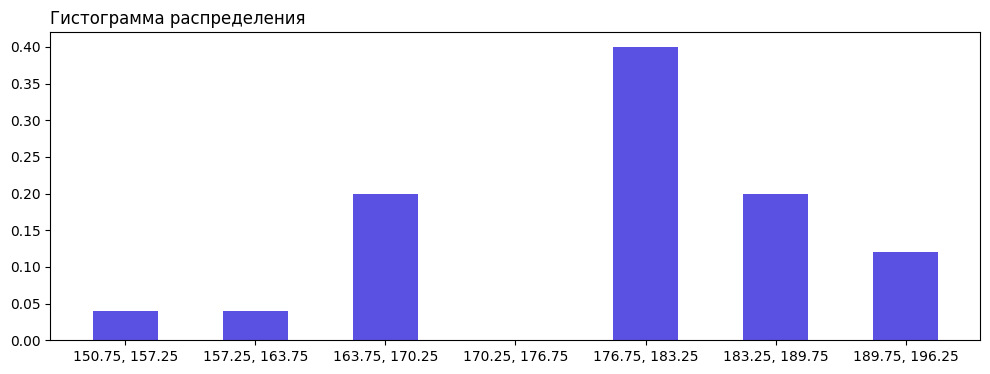

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(12)
ax.set_title('Гистограмма распределения', loc = 'left')
plt.bar(df['indx'], df['wi'], color='#5A50E2', width=0.5)
plt.show()

###Выражение для эмпирической функции распределения и её график

In [ ]:
df

,level_0,level_1,ni,wi,indx
0,150.75,157.25,1,0.04,"150.75, 157.25"
1,157.25,163.75,1,0.04,"157.25, 163.75"
2,163.75,170.25,5,0.20,"163.75, 170.25"
3,170.25,176.75,0,0.00,"170.25, 176.75"
4,176.75,183.25,10,0.40,"176.75, 183.25"
5,183.25,189.75,5,0.20,"183.25, 189.75"
6,189.75,196.25,3,0.12,"189.75, 196.25"


In [68]:
def func(x):
    return x / n_heights

#y = [0, 0.2, 0.26, 0.33, 0.4, 0.53, 0.6, 0.66, 1]
#x = [0, 1, 2, 5, 6, 7, 9, 10, 11]
y = [0, 0.04, 0.08, 0.28, 0.28, 0.68, 0.88, 1]
x = df['indx']
x = ['',
    '150.75, 157.25',
    '157.25, 163.75',
    '163.75, 170.25',
    '170.25, 176.75',
    '176.75, 183.25',
    '183.25, 189.75',
    '189.75, 196.25']

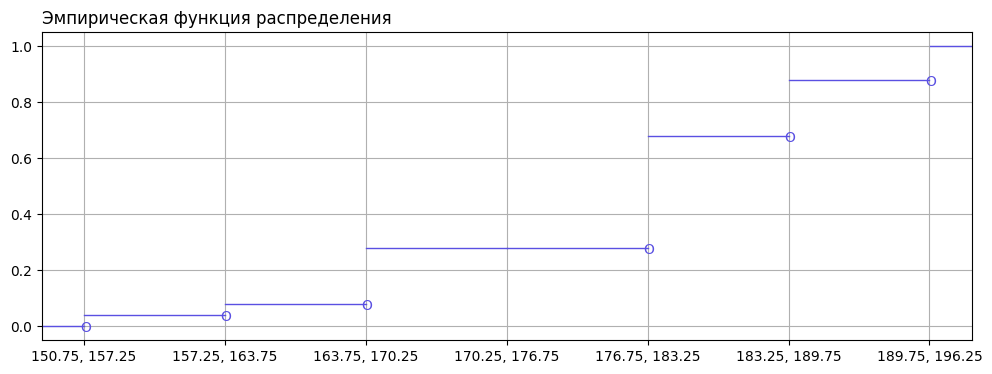

In [98]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(12)
ax.set_title('Эмпирическая функция распределения', loc = 'left')

for i in range(1, 7):
    ax.plot([x[i], x[i + 1]], [y[i], y[i]], linewidth=1.0, color='#5A50E2')
    #ax.scatter(x[i + 1], y[i], color='#5A50E2', s=100, marker ="+")
ax.plot([x[1], x[1]], [y[0], y[0]], linewidth=1.0, color='#5A50E2')
ax.plot([x[7], x[7]], [y[7], y[7]], linewidth=1.0, color='#5A50E2')

ax.axhline(y = 0, xmax = 0.045, linewidth=1.0, color='#5A50E2')
ax.axhline(y = 1, xmin = 0.955, linewidth=1.0, color='#5A50E2')

for i in range(7):
    if i != 3:
        plt.annotate(
                'O',
                ha='left',
                xy=(i - 0.03, y[i] - 0.02),
                color='#5A50E2')

plt.grid()
plt.show()

###Выборочные статистики

In [ ]:
#среднее
import numpy as np
np.mean(heights)

178.856

In [ ]:
#d
round(np.var(heights), 4)

90.4057

In [ ]:
#std
round(np.std(heights), 4)

9.5082

In [ ]:
#cov
round(round(np.std(heights), 4) / np.mean(heights), 4)

0.0532

In [ ]:
np.median(heights)

182.0